# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

#df.head()
#df.info()
df.describe()
print(df.columns)

# missing values
#print(df.isnull().sum())



Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. censusData.csv

2. I will be predicting whether an individual's income exceeds $50,000 per year. The label for this prediction will be the income column, which indicates income level, represented as a binary variable with values such as <=50K and >50K.

3. This is a supervised learning problem because we have labeled data that we will use to train our model. It is a classification problem, specifically a binary classification problem, as there are only two possible outcomes for the income level <=50K vs >50K.

4. top_features = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss','sex_selfID']

5. I think the government and non-profits can use income data to identify and help financially marginalized groups.



## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Missing values after replacement:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64
Top 4 Features: 1            fnlwgt
0               Age
3      Capital Gain
5    Hours per Week
Name: Feature, dtype: object


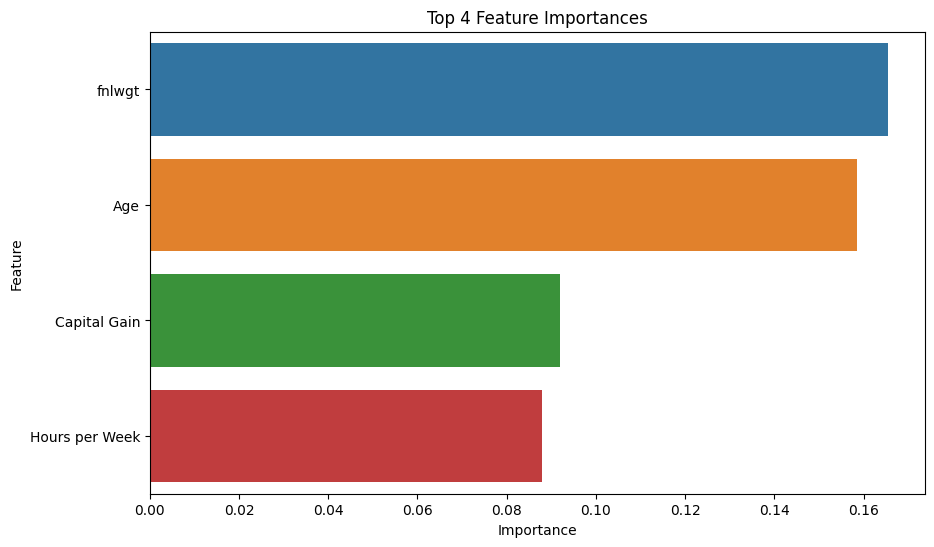

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
# Handling Missing Values
# Replace missing values in numerical columns with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Replace missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Check if there are any missing values left
print("Missing values after replacement:")
print(df.isnull().sum())

# Renaming columns for better understanding
df.rename(columns={
    'age': 'Age',
    'workclass': 'Work Class',
    'education': 'Education',
    'education-num': 'Education Num',
    'marital-status': 'Marital Status',
    'occupation': 'Occupation',
    'relationship': 'Relationship',
    'race': 'Race',
    'sex_selfID': 'Sex',
    'capital-gain': 'Capital Gain',
    'capital-loss': 'Capital Loss',
    'hours-per-week': 'Hours per Week',
    'native-country': 'Native Country',
    'income_binary': 'Income'
}, inplace=True)

# One-hot encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#print(df.columns)
X = df.drop('Income_>50K', axis=1)
y = df['Income_>50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select the top 4 features
top_features = feature_importances.head(4)['Feature']
print("Top 4 Features:", top_features)

# Visualization of the top 4 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(4))
plt.title('Top 4 Feature Importances')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, the new feature list is fnlwgt,Age, Capital Gain, and Hours per Week.

2.
For handling missing values, I replaced  missing values in numerical columns with the mean of the columns.

For renaming the featuers, I renamed the columns to ensure they are easier to identify.
   
For choosing the features, I selected only the relevant features (Age, Capital Gain, Hours per Week, Education Num) for modeling.I figured out which features were relevant by using a Random Forest classifier to determine feature importance. 

I applied one-hot encoding to categorical variables to convert them into a numerical format suitable for machine learning algorithms. This step ensures that all categorical data is properly represented in the model. After that, I examined the importance scores provided by the Random Forest model and visualized a graph. By doing so, I was able to identify which features have the most significant impact on my label.

3. The model that I chose was Random Forest Classifier. I chose this model because allows feature rankings using categorical and numerical data.

4. I first used one-hot encoding to convert categorical data into a numerical format suitable for machine learning algorithms. I did so to ensure that all categorical data is properly represented in the model. I then used a Random Forest classifier to determine feature importance. By examining the importance scores provided by the Random Forest model, I was able to identify which features have the most significant impact on predicting the target variable. I also visualized my results to easily see the rankings.

For model training, I used Data Splitting. I first Split the data into training and testing sets to ensure that model performance can be evaluated. I then trained the Random Forest classifier on the training set using default parameters initially.

For my evaluation stage, I utilized accuracy, precision, recall, F1-score, and ROC-AUC to comprehensively understand my model's performance. Accuracy measured the overall correctness, while precision indicated the reliability of positive predictions by showing the proportion of true positive predictions out of all positive predictions. I used Recall to assess the model's effectiveness in identifying actual positives, and the F1-score provided me with a balanced metric between precision and recall. Additionally, ROC-AUC evaluated the model's performance across all classification thresholds, and the ROC curve visualized the trade-off between true positive and false positive rates. 

To improve the model's performance, I used GridSearchCV for hyperparameter tuning. I set up a grid with different values for n_estimators, max_features, max_depth, and criterion. I used GridSearchCV to find the best hyperparameters by evaluating combinations based on ROC-AUC scoring.

The results were: 
Best ROC AUC Score: 0.9080686209784329
Best Model Accuracy: 0.8529095654844158
Best Model Precision: 0.8061938061938062
Best Model Recall: 0.5136855506047103
Best Model F1 Score: 0.6275272161741835
Best Model ROC AUC Score: 0.910862954898078

I compared the results of the two graph by using the ROC curves for both models. The graph that was plotted together for comparison.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Missing values after replacement:
Age                               0
fnlwgt                            0
Education Num                     0
Capital Gain                      0
Capital Loss                      0
                                 ..
Native Country_Trinadad&Tobago    0
Native Country_United-States      0
Native Country_Vietnam            0
Native Country_Yugoslavia         0
Income_>50K                       0
Length: 98, dtype: int64
Top 4 Features: 1            fnlwgt
0               Age
3      Capital Gain
5    Hours per Week
Name: Feature, dtype: object


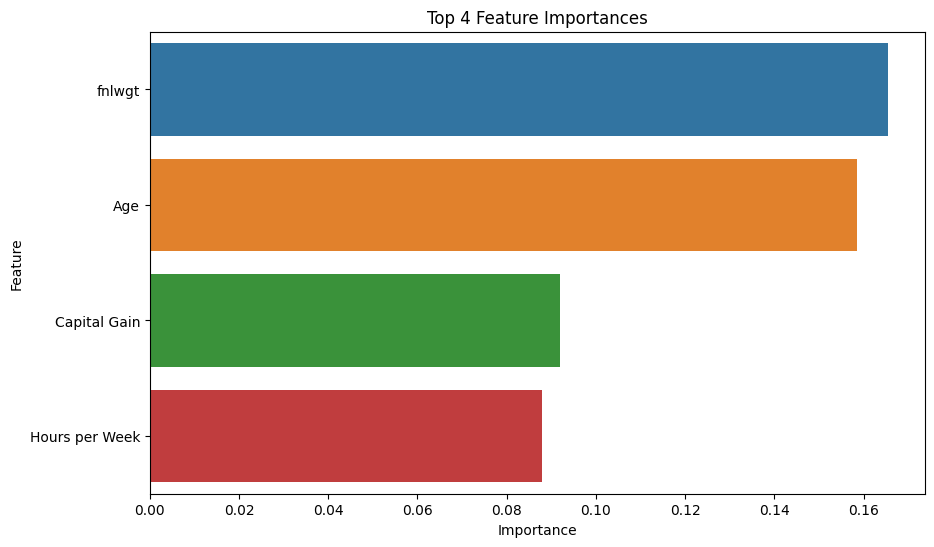

Accuracy: 0.8596652848149854
Precision: 0.7460674157303371
Recall: 0.633991088478676
F1 Score: 0.6854783207157605
ROC AUC Score: 0.9051655473383032


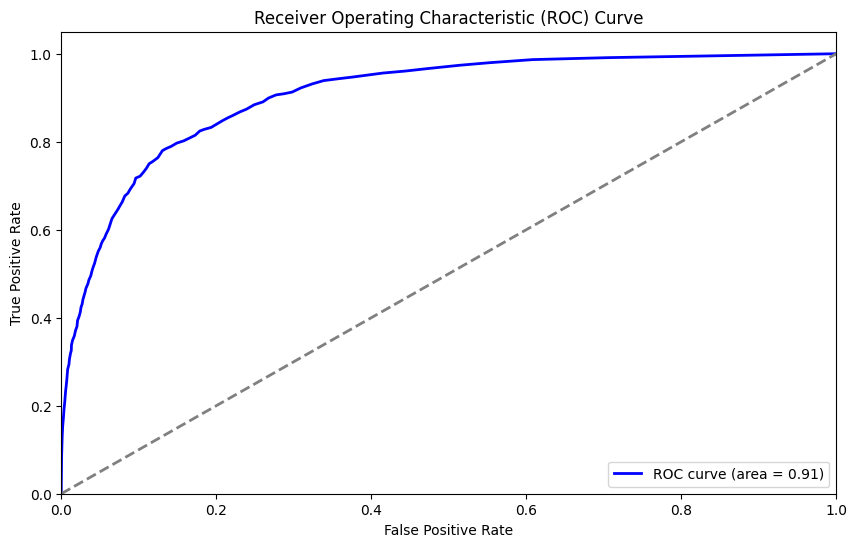

Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best ROC AUC Score: 0.9080686209784329
Best Model Accuracy: 0.8529095654844158
Best Model Precision: 0.8061938061938062
Best Model Recall: 0.5136855506047103
Best Model F1 Score: 0.6275272161741835
Best Model ROC AUC Score: 0.910862954898078


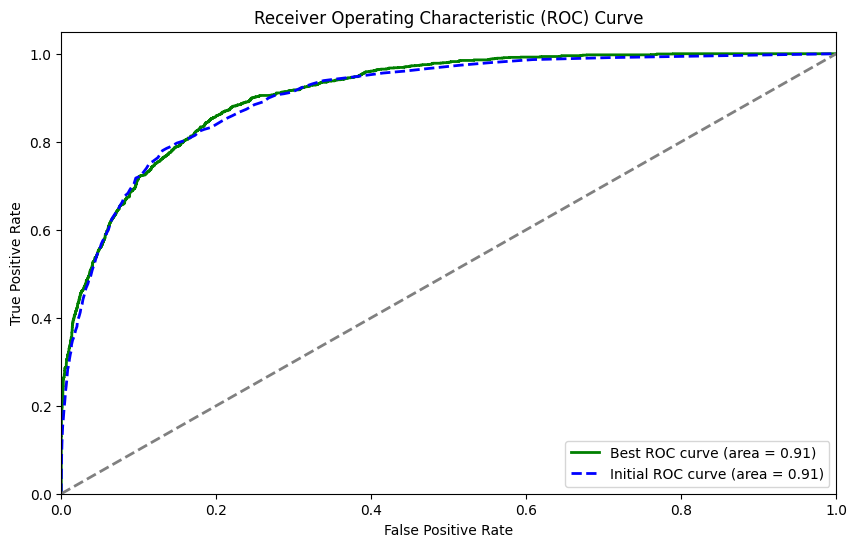

In [5]:

# Handling Missing Values
# Replace missing values in numerical columns with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Replace missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Check if there are any missing values left
print("Missing values after replacement:")
print(df.isnull().sum())

# Renaming columns for better understanding
df.rename(columns={
    'age': 'Age',
    'workclass': 'Work Class',
    'education': 'Education',
    'education-num': 'Education Num',
    'marital-status': 'Marital Status',
    'occupation': 'Occupation',
    'relationship': 'Relationship',
    'race': 'Race',
    'sex_selfID': 'Sex',
    'capital-gain': 'Capital Gain',
    'capital-loss': 'Capital Loss',
    'hours-per-week': 'Hours per Week',
    'native-country': 'Native Country',
    'income_binary': 'Income'
}, inplace=True)

# One-hot encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#print(df.columns)
X = df.drop('Income_>50K', axis=1)
y = df['Income_>50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select the top 4 features
top_features = feature_importances.head(4)['Feature']
print("Top 4 Features:", top_features)

# Visualization of the top 4 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(4))
plt.title('Top 4 Feature Importances')
plt.show()


###

# Model Evaluation
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



### hyperparameter tuning for model optimization (Part 5)

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

# Retrain with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict on test set
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

# Evaluation of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_proba_best)

print(f"Best Model Accuracy: {accuracy_best}")
print(f"Best Model Precision: {precision_best}")
print(f"Best Model Recall: {recall_best}")
print(f"Best Model F1 Score: {f1_best}")
print(f"Best Model ROC AUC Score: {roc_auc_best}")

# ROC Curve for best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, color='green', lw=2, label=f'Best ROC curve (area = {roc_auc_best:.2f})')
plt.plot(fpr, tpr, color='blue', lw=2, linestyle='--', label=f'Initial ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()